# **Blockchain Analytics**
Analysis of Bitcoin blockchain data (transaction graph) to find potential indicators of incidents

_by Dhruv Chopra and Siddhant Pathak_

## **Import all the necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx
import time
import requests
sb.set()

## **Query the data from the Blockchain API and organize it**


In [3]:
response = requests.get("https://blockchain.info/rawtx/0e3e2357e806b6cdb1f70b54c3a3a17b6714ee1f0e68bebb44a74b1efd512098")
jason = response.json()

In [ ]:
#response = requests.get("https://blockchain.info/q/getreceivedbyaddress/12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX")

In [ ]:
jason

In [6]:
new = jason['out'][0]['addr']

In [7]:
new

'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX'

In [8]:
response = requests.get("https://blockchain.info/rawaddr/"+new)

In [9]:
transactions = response.json()

In [ ]:
transactions

In [ ]:
rev = transactions['txs']
rev.reverse()
for i in rev:
    print(i['block_height'])

## **Creating the graph**

In [ ]:
stack1 = []
stack2 = []
g = nx.MultiDiGraph()

address='12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX'
stack1
stack1.append(address)

color=[]
edge_color=[]
completed = []
level = 0
LEVEL = 10

while(level < LEVEL):
    address = stack1.pop()
    response = requests.get("https://blockchain.info/rawaddr/"+address)
    address_info = response.json()
    
    transactions = address_info['txs']
    transactions.reverse()

    for i in transactions:
        if(i['hash'] not in completed):
            completed.append(i['hash'])
            #g.add_edge(address,i['hash'],weight = i['weight'])
            for j in i["inputs"]:
                
                if j['prev_out']['addr'] not in g:
                    color.append('blue')
                if i['hash'] not in g:
                    color.append('red')
                edge_color.append('purple')   
                g.add_edge(j['prev_out']["addr"],i['hash'], weight = j['prev_out']['value']*0.00000001)
                stack2.append(j['prev_out']["addr"])
            
            for j in i["out"]:
                
                if i['hash'] not in g:
                    color.append('red')
                if j['addr'] not in g:
                    color.append('blue')
                edge_color.append('green')
                g.add_edge(i['hash'],j["addr"], weight = j['value']*0.00000001)
                stack2.append(j['addr'])
            
            break
            
    if(len(stack1)==0):
        stack1 = stack2
        level = level +1
        
    time.sleep(8.5)

## **Store the graph**

In [14]:
nx.write_edgelist(g, path = "graph.csv", delimiter=":")

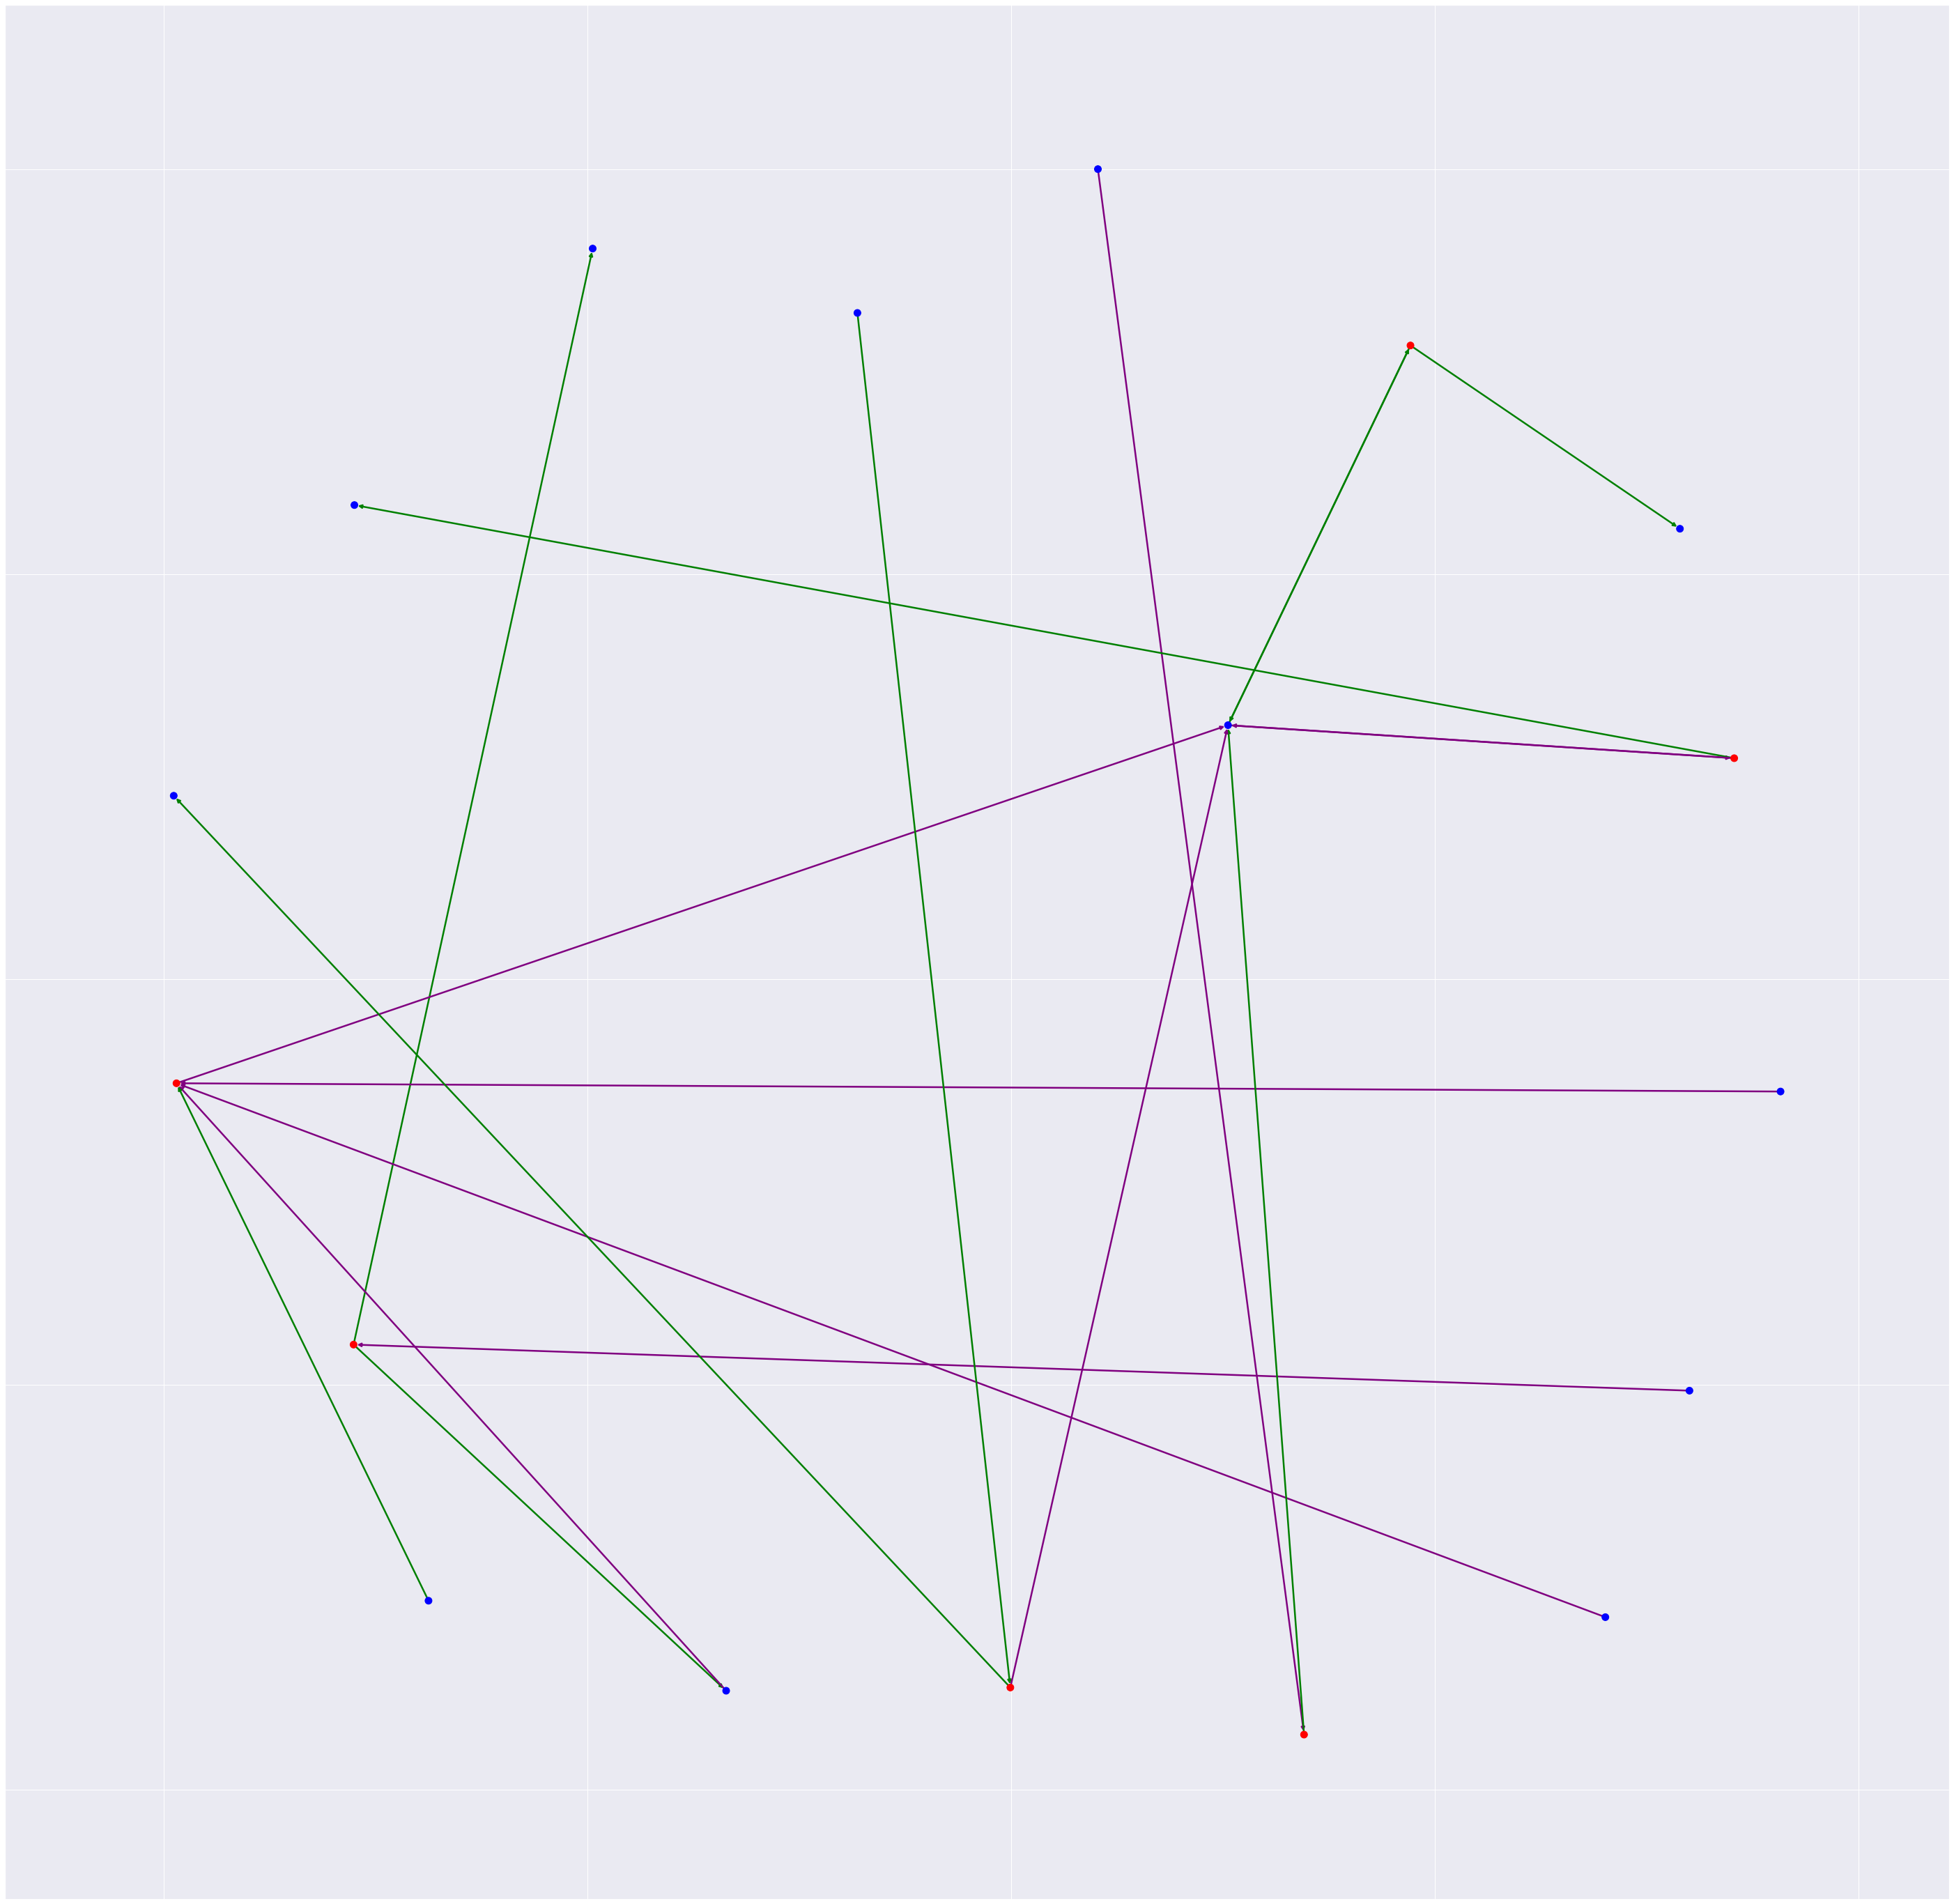

In [59]:
plt.figure(4, figsize=(50,50))
pos = nx.spring_layout(g, center=None, dim=2)
nx.draw_networkx(g,pos=pos, node_size=99, edge_color=edge_color, node_color=color, width=2.5, with_labels=False)
#labels = nx.get_edge_attributes(g,'weight')
#nx.draw_networkx_edge_labels(g,pos)
plt.show()

In [ ]:
plt.savefig("graph.png")

<Figure size 432x288 with 0 Axes>

# **Centrality**

## **VoteRank Algorithm**
VoteRank computes a ranking of the nodes in a graph G based on a voting scheme. With VoteRank, all nodes vote for each of its in-neighbours and the node with the highest votes is elected iteratively. The voting ability of out-neighbors of elected nodes is decreased in subsequent turns.


In [24]:
node_voterank = nx.algorithms.centrality.voterank(g)
node_voterank

['56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70',
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE',
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC',
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9',
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ',
 'e63cf8a6ed2a3034e18759aa7ba4e35e4fae166c80c262f743327049cfd3b8a2',
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66',
 'b3bb444df5c5cebf5debdd86bc9160712a5c6586c52bf913e7e8bfc59f2d1e29',
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh']

## **Percolation Centrality** (error)
Percolation centrality of a node v, at a given time, is defined as the proportion of ‘percolated paths’ that go through that node. This measure quantifies relative impact of nodes based on their topological connectivity, as well as their percolation states. Percolation states of nodes are used to depict network percolation scenarios (such as during infection transmission in a social network of individuals, spreading of computer viruses on computer networks, or transmission of disease over a network of towns) over time. In this measure usually the percolation state is expressed as a decimal between 0.0 and 1.0.

In [39]:
node_percolation = nx.algorithms.centrality.percolation_centrality(g)
node_percolation

KeyError: ignored

## **PageRank Algorithm** (error)
PageRank is an algorithm used by Google Search to rank web pages in their search engine results. PageRank is a way of measuring the importance of website pages.

In [51]:
node_pagerank = nx.algorithms.link_analysis.pagerank_alg.pagerank(g)
node_pagerank 

NetworkXNotImplemented: ignored

## **Degree of Nodes**
`degree_centrality(G)` : Compute the degree centrality for nodes.

`in_degree_centrality(G)` : Compute the in-degree centrality for nodes.

`out_degree_centrality(G)` : Compute the out-degree centrality for nodes.

In [35]:
node_degree = nx.degree_centrality(g)
node_deg_in = nx.in_degree_centrality(g)
node_deg_out = nx.out_degree_centrality(g)

In [48]:
node_degree

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 0.058823529411764705,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 0.058823529411764705,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 0.058823529411764705,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 0.058823529411764705,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 0.058823529411764705,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 0.058823529411764705,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 0.058823529411764705,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 0.11764705882352941,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 0.4117647058823529,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 0.058823529411764705,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 0.058823529411764705,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 0.058823529411764705,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.29411764705882354,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 0.1764705882352941,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 0.1764705882352941,
 '7

In [49]:
node_deg_in

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 0.058823529411764705,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 0.058823529411764705,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 0.058823529411764705,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 0.0,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 0.0,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 0.0,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 0.058823529411764705,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 0.058823529411764705,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 0.29411764705882354,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 0.0,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 0.0,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 0.0,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.23529411764705882,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 0.058823529411764705,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 0.058823529411764705,
 '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3': 0.058823529411764705,
 'b3bb44

In [50]:
node_deg_out

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 0.0,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 0.0,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 0.0,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 0.058823529411764705,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 0.058823529411764705,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 0.058823529411764705,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 0.0,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 0.058823529411764705,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 0.11764705882352941,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 0.058823529411764705,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 0.058823529411764705,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 0.058823529411764705,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.058823529411764705,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 0.11764705882352941,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 0.11764705882352941,
 '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3

## **Eigenvector and Katz Centrality** (error)
Katz centrality is a generalization of degree centrality. Degree centrality measures the number of direct neighbors, and Katz centrality measures the number of all nodes that can be connected through a path, while the contributions of distant nodes are penalized. 

In [90]:
node_eigen = nx.eigenvector_centrality(g)
node_eigen

NetworkXNotImplemented: ignored

In [91]:
node_katz = nx.katz_centrality(g)
node_katz

NetworkXNotImplemented: ignored

## **Closeness**
`closeness_centrality(G[, u, distance, …])` : Compute closeness centrality for nodes.

`incremental_closeness_centrality(G, edge[, …])`: Incremental closeness centrality for nodes.

Notice that higher values of closeness indicate higher centrality.

In [46]:
node_close = nx.closeness_centrality(g)
node_close

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 0.0784313725490196,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 0.0784313725490196,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 0.23058823529411765,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 0.0,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 0.0,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 0.0,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 0.23058823529411765,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 0.0784313725490196,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 0.4142156862745097,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 0.0,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 0.0,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 0.0,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.23529411764705882,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 0.058823529411764705,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 0.27614379084967317,
 '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3': 0.058823529411764705,
 'b3bb444df5c5cebf

In [52]:
node_close_inc = nx.incremental_closeness_centrality(g, edge = ('1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc', '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70') )

NetworkXNotImplemented: ignored

## **Current Flow Closeness** (error)
Compute current-flow closeness centrality for nodes.


In [55]:
node_cur = nx.current_flow_closeness_centrality(g)

NetworkXNotImplemented: ignored

In [56]:
node_cur_info = nx.information_centrality(g)

NetworkXNotImplemented: ignored

## **Dispersion**
Calculate dispersion between u and v in G.

A link between two actors (u and v) has a high dispersion when their mutual ties (s and t) are not well connected with each other.

If u (v) is specified, returns a dictionary of nodes with dispersion score for all “target” (“source”) nodes. If neither u nor v is specified, returns a dictionary of dictionaries for all nodes ‘u’ in the graph with a dispersion score for each node ‘v’.

In [92]:
dispersion = nx.dispersion(g)
dispersion

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': {},
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': {},
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': {},
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': {'35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.0},
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': {'35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.0},
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': {'7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3': 0.0},
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': {},
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': {'35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.0},
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': {'6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 0.0,
  'b3bb444df5c5cebf5debdd86bc9160712a5c6586c52bf913e7e8bfc59f2d1e29': 0.0},
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': {'56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 0.0},
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': {'e63cf8a6ed2a3034e18759aa7ba4

## **Harmonic Centrality**
Harmonic centrality of a node u is the sum of the reciprocal of the shortest path distances from all other nodes to u.

In [61]:
harmonic = nx.harmonic_centrality(g)
harmonic

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 1.5,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 1.5,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 4.700000000000001,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 0,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 0,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 0,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 4.700000000000001,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 1.5,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 8.583333333333334,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 0,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 0,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 0,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 4.833333333333333,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 1.0,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 5.449999999999999,
 '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3': 1.0,
 'b3bb444df5c5cebf5debdd86bc9160712a5c6586c52bf913e7e8bfc59f2d1e29': 5.449999999999999,
 'e63cf8a6ed2a3034e18759aa7ba4

## **Reaching**
`local_reaching_centrality(G, v[, paths, …])` : Returns the local reaching centrality of a node in a directed graph. The local reaching centrality of a node in a directed graph is the proportion of other nodes reachable from that node

`global_reaching_centrality(G[, weight, …]`) : Returns the global reaching centrality of a directed graph. The global reaching centrality of a weighted directed graph is the average over all nodes of the difference between the local reaching centrality of the node and the greatest local reaching centrality of any node in the graph.



In [63]:
global_reach =  nx.global_reaching_centrality(g)
global_reach

0.27681660899653976

## **Second Order Centrality** (error)
The second order centrality of a given node is the standard deviation of the return times to that node of a perpetual random walk on G:



In [64]:
node_2nd_order = nx.second_order_centrality(g)
node_2nd_order

NetworkXNotImplemented: ignored

## **Trophic** (2 error)
`trophic_levels(G[, weight])` : Compute the trophic levels of nodes.

`trophic_differences(G[, weight])` : Compute the trophic differences of the edges of a directed graph.

`trophic_incoherence_parameter(G[, weight, …])` : Compute the trophic incoherence parameter of a graph.


In [66]:
trophic = nx.trophic_levels(g)
trophic

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 3.0,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 3.0,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 18.671292307692305,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 1,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 1,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 1,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 18.671292307692305,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 3.0,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 16.671292307692305,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 1,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 1,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 1,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 2.64,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 2.0,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 17.671292307692305,
 '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3': 2.0,
 'b3bb444df5c5cebf5debdd86bc9160712a5c6586c52bf913e7e8bfc59f2d1e29': 17.671292307692305,
 'e63cf8a6ed2a3034e18759aa7ba4e35e4fae

In [67]:
trophic_differences = nx.trophic_differences(g)

ValueError: ignored

In [68]:
incoherence = nx.trophic_incoherence_parameter(g)

ValueError: ignored

## **Subgraph** (error)
`subgraph_centrality(G)` : Returns subgraph centrality for each node in G.

`subgraph_centrality_exp(G)` : Returns the subgraph centrality for each node of G.

`estrada_index(G) `: Returns the Estrada index of a the graph G.


In [69]:
subgraph =  nx.subgraph_centrality(g)
subgraph

NetworkXNotImplemented: ignored

In [70]:
sub_exp = nx.subgraph_centrality_exp(g)
sub_exp

NetworkXNotImplemented: ignored

In [71]:
estrada = nx.estrada_index(g)

NetworkXNotImplemented: ignored

## **Load** 
The load centrality of a node is the fraction of all shortest paths that pass through that node.


In [73]:
load = nx.load_centrality(g)
load

{'12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX': 0.0,
 '149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf': 0.0,
 '17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp': 0.0,
 '17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh': 0.0,
 '1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr': 0.0,
 '1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9': 0.0,
 '1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U': 0.0,
 '1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC': 0.044117647058823525,
 '1EPKg1FhN9HDJ87Cprs2V83X7dd74v9PrE': 0.1764705882352941,
 '1Ep8AVZx89qmBzzeu1zPpKLF8pxHfkZaJc': 0.0,
 '1GergKtsRu18YQVhYchDXSU5XeYTMhDeLQ': 0.0,
 '1LBUHKaCabcKDpfjYmTfKAbX7uqR5KYbkZ': 0.0,
 '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6': 0.11029411764705882,
 '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70': 0.029411764705882353,
 '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66': 0.04779411764705882,
 '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3': 0.01838235294117647,
 'b3bb444df5c5cebf5debdd86bc9160712a5c6586c52bf913e7e8bfc59f2d1e29': 0.04779411

In [74]:
edge_load = nx.edge_load_centrality(g)
edge_load

{('12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX',
  '56484b549f42a4485fb79b2838c7829805d025a28a46248eec677aaba78e4b70'): 18.0,
 ('149KZtTJLpM8CQiUFY3LGCxDoHr9rogRgf',
  'e63cf8a6ed2a3034e18759aa7ba4e35e4fae166c80c262f743327049cfd3b8a2'): 18.0,
 ('17XLaSzT7ZpzEJmFvnqEFycoEUXDaXkPcp',
  'b3bb444df5c5cebf5debdd86bc9160712a5c6586c52bf913e7e8bfc59f2d1e29'): 18.0,
 ('17xph7pMpCkqVAnryYDPJzGFwXPx8n7KXh',
  '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6'): 23.0,
 ('1APKqPg88niheQWwJ9pntFGJ1pprbWmvtr',
  '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6'): 23.0,
 ('1BJJn7aDwTYGE5gepf1jpdeLBEAHMxqkB9',
  '7aec2158c826f07c9a98fcaa2139a93162768b2d62bdb32237a3d87c0aefdae3'): 23.0,
 ('1BvdjWWwsK9Y1A9S1u8FLqcPT3y7CSKk7U',
  '6ac6da3535c6b3a04cef67d077454b938db81dc1a25ee2b2ed1530870b694b66'): 18.0,
 ('1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC',
  '35ee5eabda5be49ec01ecd08becbeefb10a8354306ba957be0cae45e8d2f46c6'): 33.0,
 ('1CJ8w6AvJ86qGbLQU8EgZqbqJJUW3a9bmC',
  '56484b549f42a4485fb79

## **Group Centrality** (error)
`group_betweenness_centrality(G, C[, …])`: Compute the group betweenness centrality for a group of nodes.

`group_closeness_centrality(G, S[, weight])`: Compute the group closeness centrality for a group of nodes.

`group_degree_centrality(G, S)`: Compute the group degree centrality for a group of nodes.

`group_in_degree_centrality(G, S)`: Compute the group in-degree centrality for a group of nodes.

`group_out_degree_centrality(G, S)`: Compute the group out-degree centrality for a group of nodes.

In [76]:
gp_btw = nx.group_betweenness_centrality(g, C=g.nodes)
gp_btw

ZeroDivisionError: ignored

In [85]:
gp_close = nx.group_closeness_centrality(g,S=g.nodes)
gp_close

0

In [86]:
gp_deg = nx.group_degree_centrality(g, g.nodes)

ZeroDivisionError: ignored

In [87]:
gp_in = nx.group_in_degree_centrality(g, g.nodes)
gp_in

ZeroDivisionError: ignored

In [88]:
gp_out = nx.group_out_degree_centrality(g, g.nodes)
gp_out

ZeroDivisionError: ignored

## **Communicability Betweenness** (error)
Communicability betweenness measure makes use of the number of walks connecting every pair of nodes as the basis of a betweenness centrality measure.

In [89]:
comm_btw = nx.communicability_betweenness_centrality(g)

NetworkXNotImplemented: ignored